In [ ]:
!pip install -U spacy
!python -m spacy download ru_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.3 MB 5.0 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')


In [ ]:
!pip install spacy-transformers==0.6.2
!pip install texthero
!pip install scikit-learn==0.22.0
!pip install thinc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached spacy-2.3.7-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.4 MB)
  Using cached srsly-1.0.5-cp37-cp37m-manylinux2014_x86_64.whl (184 kB)
  Using cached thinc-7.4.5-cp37-cp37m-manylinux2014_x86_64.whl (1.0 MB)
  Using cached catalogue-1.0.0-py2.py3-none-any.whl (7.7 kB)
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.4
    Uninstalling srsly-2.4.4:
      Successfully uninstalled srsly-2.4.4
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.8
    Uninstalling catalogue-2.0.8:
      Successfully uninstalled catalogue-2.0.8
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.2
    Uninstalling thinc-8.1.2:
      Successfully uninstalled thinc-8.1.2
  Attempting uninstall: spacy
    Found existing installation: spacy 3.4.1
    Uninstalling spacy-3.4.1:
      Successfully uninstalled spacy

# Importing Required Libraries

In [65]:
import pandas as pd
import numpy as np
import regex
import matplotlib.pyplot as plt
%matplotlib inline
import texthero as hero

## Load the dataset

In [193]:
df = pd.read_csv('/content/assignment_data - assignment_data.csv')
df.head()

,Unnamed: 0,description,value
0,0,<html><body><p>Know how of Automotive Diagnosi...,Bengaluru
1,1,<html><body><ul><li><p>Total 4+ years of exper...,Bengaluru
2,2,<html><body><ul><li><p>Total of 8+ years of ex...,Bengaluru
3,3,<html><body><p>Work Experience : 8-12 years</p...,Bengaluru
4,4,<html><body><p><strong>Job Description </stron...,Bengaluru


In [194]:
#Shape of dataset
df.shape

(2367, 3)

In [195]:
df.info()#gives genearal information regarding column name, datatype, & count.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2367 entries, 0 to 2366
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   2367 non-null   int64 
 1   description  2356 non-null   object
 2   value        2367 non-null   object
dtypes: int64(1), object(2)
memory usage: 55.6+ KB


## Data Cleansing & EDA

In [196]:
#Lets check for Null Values
df.isnull().sum()

Unnamed: 0      0
description    11
value           0
dtype: int64

In [197]:
#so we have 11 null values and its a small values so we can drop them.
df_n = df.dropna()

In [198]:
#lets check again whether its got deleted or not
df_n.isnull().sum()

Unnamed: 0     0
description    0
value          0
dtype: int64

In [199]:
#replacing special symbol from data.
df_n['clean_desc'] = df_n['description'].str.replace(r'<[^<>]*>', ' ', regex=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [200]:
#replacing html keyword from data.
df_n['clean_desc'] = df_n['clean_desc'].str.replace(r'\W'," ")



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [201]:
#Drop irrelevent columns
df_n.drop(['Unnamed: 0'],axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [202]:
#shape of data
df_n.shape

(2356, 3)

In [203]:
df_n.head()

,description,value,clean_desc
0,<html><body><p>Know how of Automotive Diagnosi...,Bengaluru,Know how of Automotive Diagnosis UDS over ...
1,<html><body><ul><li><p>Total 4+ years of exper...,Bengaluru,Total 4 years of experience with min 2 ...
2,<html><body><ul><li><p>Total of 8+ years of ex...,Bengaluru,Total of 8 years of experience with 3 ...
3,<html><body><p>Work Experience : 8-12 years</p...,Bengaluru,Work Experience 8 12 years Work location...
4,<html><body><p><strong>Job Description </stron...,Bengaluru,Job Description Financial analysis ...


In [204]:
df_n['clean_desc'] =(df_n['clean_desc'].pipe(hero.clean))#here hero.clean funtion is used to clean the text.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [206]:
#Exporting a copy of filered data for further analysis if required
df_n.to_csv(r"Filtered_data.csv")

## word cloud visualization

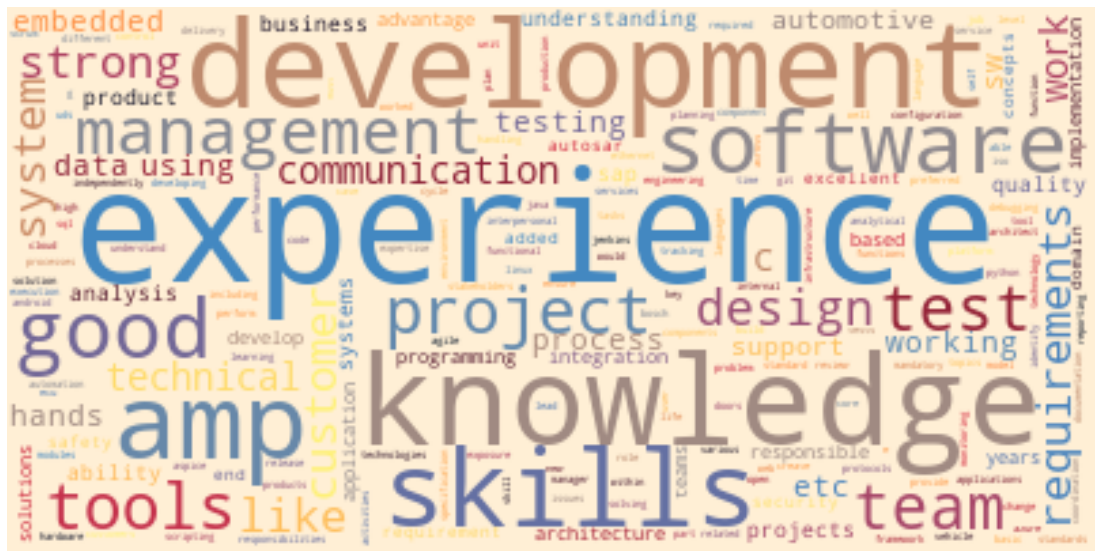

In [ ]:
hero.wordcloud(df_n['clean_desc'])

From above word cloud we can see that the most frequent occuring words are Development, Knowledge, Experience, skills, project, management like that.

In [80]:
#frequency of top occurng word
Top_occuring_word = hero.top_words(df_n['clean_desc'])
print(Top_occuring_word)

experience     6376
knowledge      3877
development    3766
amp            2997
skills         2921
               ... 
vmotion           1
esxi              1
vapps             1
nucleus           1
sundays           1
Name: clean_desc, Length: 8700, dtype: int64


In [ ]:
df_n.head()

,description,value,clean_desc
0,<html><body><p>Know how of Automotive Diagnosi...,Bengaluru,know automotive diagnosis uds implementation i...
1,<html><body><ul><li><p>Total 4+ years of exper...,Bengaluru,total years experience min years experience ib...
2,<html><body><ul><li><p>Total of 8+ years of ex...,Bengaluru,total years experience years experience leadin...
3,<html><body><p>Work Experience : 8-12 years</p...,Bengaluru,work experience years work location bangalore ...
4,<html><body><p><strong>Job Description </stron...,Bengaluru,job description financial analysis reporting p...


# Clustering | K means using bag of words

In [79]:
# Generating bag of words features.
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bow = count_vect.fit_transform(df_n['clean_desc'].values)
bow.shape#bow mean Bag of words

(2356, 8682)

In [81]:
# to understand what kind of words generated as columns by BOW
terms = count_vect.get_feature_names()

In [82]:
#first 10 columns generated by BOW
terms[1:10]

['100base', '10g', '10yrs', '11b', '11g', '12c', '12x', '13years', '16bit']

Text(0, 0.5, 'total_within_SS')

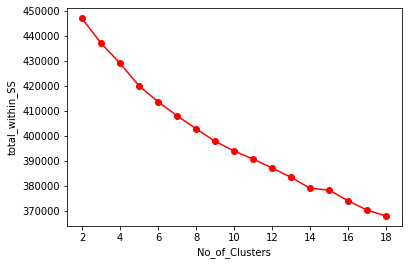

In [ ]:
#using all processes jobs=-1 and k means++ for starting initilization advantage
from sklearn.cluster import KMeans
#checking for optimal number of clusters
from sklearn.cluster import KMeans
TWSS = []
K = list(range (2,19))
for i in K:
    model = KMeans(n_clusters = i ,init='random', n_jobs = -1,random_state=99)
    model.fit(bow)
    TWSS.append(model.inertia_)
    
TWSS
# Scree plot 
plt.plot(K, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [218]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 5 ,init='k-means++', n_jobs = -1,random_state=99)
model.fit(bow)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=99, tol=0.0001, verbose=0)

In [219]:
labels = model.labels_
cluster_center=model.cluster_centers_

In [220]:
cluster_center

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00106952,
        0.        ],
       [0.00689655, 0.0137931 , 0.        , ..., 0.05517241, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00275862, ..., 0.        , 0.        ,
        0.00137931]])

In [221]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(bow, labels, metric='euclidean')
#The value of the silhouette coefﬁcient is between [-1, 1]

In [222]:
# which tells us that clusters are far away from each other 
silhouette_score

0.017723419340042394

In [223]:
# Giving Labels/assigning a cluster to each point/text 
df_n['Bow Clus Label'] = model.labels_ # the last column you can see the label numebers
df_n.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,description,value,clean_desc,Tfidf Clus Label,Bow Clus Label
0,<html><body><p>Know how of Automotive Diagnosi...,Bengaluru,know automotive diagnosis uds implementation i...,1,2
1,<html><body><ul><li><p>Total 4+ years of exper...,Bengaluru,total years experience min years experience ib...,2,4
2,<html><body><ul><li><p>Total of 8+ years of ex...,Bengaluru,total years experience years experience leadin...,2,4
3,<html><body><p>Work Experience : 8-12 years</p...,Bengaluru,work experience years work location bangalore ...,0,4
4,<html><body><p><strong>Job Description </stron...,Bengaluru,job description financial analysis reporting p...,0,1
5,<html><body><p>Experience in programming Embed...,Bengaluru,experience programming embedded c applications...,1,2
6,<html><body><p>•Feature/Subsystem ownership in...,Bengaluru,feature subsystem ownership customer projects ...,4,1
7,<html><body><p>The PCM is responsible for the ...,Bengaluru,pcm responsible component project tasks regard...,0,3
8,<html><body><p><strong><u>Tasks</u></strong></...,Bengaluru,tasks development bootloader software various ...,3,4
9,<html><body><p>•Feature/Subsystem ownership in...,Bengaluru,feature subsystem ownership customer projects ...,4,1


In [224]:
# How many points belong to each cluster -> using group by in pandas
df_n.groupby(['Bow Clus Label'])['clean_desc'].count()

Bow Clus Label
0    184
1    935
2    290
3    222
4    725
Name: clean_desc, dtype: int64

In [225]:
#to find the top 10 features of cluster centriod
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = count_vect.get_feature_names()
for i in range(5):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :5]:
        print(' %s' % terms[ind], end='')
        print()

Top terms per cluster:
Cluster 0: experience
 sap
 data
 knowledge
 amp
Cluster 1: development
 amp
 software
 team
 design
Cluster 2: experience
 tools
 development
 knowledge
 like
Cluster 3: project
 development
 customer
 management
 amp
Cluster 4: experience
 knowledge
 development
 skills
 good


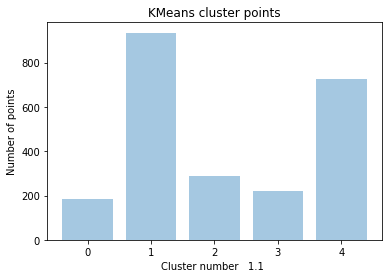

In [226]:
# visually how points or reviews are distributed across 10 clusters 
import matplotlib.pyplot as plt
plt.bar([x for x in range(5)], df_n.groupby(['Bow Clus Label'])['clean_desc'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number   1.1 ")
plt.ylabel("Number of points")
plt.show()

In [164]:
# Reading a review which belong to each group.
for i in range(5):
    print("A description of assigned to cluster ", i)
    print("-" )
    print(df_n.iloc[df_n.groupby(['Bow Clus Label']).groups[i][0]]['clean_desc'])
    print('\n')
    print("_" )

A description of assigned to cluster  0
-
expected scope work responsibilities sap ps consultant exposure cpm ppm responsibilities responsible conducting business blueprint workshops finalize solution design prepare blueprint documentation functional specifications complete build unit testing system integration testing participating performance amp regression testing conduct training core team participation cutover post go live support related sap ps ppm cpm reporting program director cfo executive team organization key skills depth knowledge sap commercial project management project systems portfolio amp project management min implementation cpm ppm completed experience industry corporate process implementation across related applications sap non sap experience defining systems strategy developing systems requirements designing prototyping testing training defining support procedures implementing practical business solutions multiple deadliness experience managing sap cpm ps ppm team 

In [165]:
#lets check by doing this
#considers sample of 3 random reviews for cluster 0

print(df_n.iloc[df_n.groupby(['Bow Clus Label']).groups[0][3]]['clean_desc'])
print("_" * 70)
print(df_n.iloc[df_n.groupby(['Bow Clus Label']).groups[0][15]]['clean_desc'])
print("_" * 70)
print(df_n.iloc[df_n.groupby(['Bow Clus Label']).groups[0][25]]['clean_desc'])

key responsibility design develop back end modules development java identity access management application remove technical roadblock conduct code reviews unit testing integration front end modules part productive scrum team build quality software key skills expertize developing applications java platform using following frameworks programing languages spring core data web mvc boot advanced knowledge developing rest apis experience working databases sql server postgresql good knowledge sql good understanding object oriented programing concepts software design familiarity ui frameworks extent integrating collaborating front end team desirable experience working idps e g keycloak okta etc familiarity oidc oauth protocols flows knowledgeable enough work linux familiarity working build frameworks like maven gradle advanced ability work within team good knowledge swagger api documentation good knowledge unit testing junit good knowledge agile scrum good knowledge hands git
_________________

# K means using TFIDF

In [83]:
#tfidf vector initililization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(df_n['clean_desc'].values)
tfidf.shape

(2356, 8682)

Text(0, 0.5, 'total_within_SS')

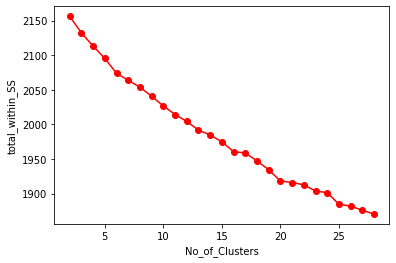

In [85]:
#using all processes jobs=-1 
from sklearn.cluster import KMeans
#checking for optimal number of clusters
from sklearn.cluster import KMeans
TWSS = []
K = list(range (2,29))
for i in K:
    model1 = KMeans(n_clusters = i , n_jobs = -1,random_state=99)
    model1.fit(tfidf)
    TWSS.append(model1.inertia_)
    
TWSS
# Scree plot 
plt.plot(K, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [208]:
from sklearn.cluster import KMeans
model_tf = KMeans(n_clusters = 5, n_jobs = -1,random_state=99)
model_tf.fit(tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=99, tol=0.0001, verbose=0)

In [209]:
labels_tf = model_tf.labels_
cluster_center_tf=model_tf.cluster_centers_

In [210]:
cluster_center_tf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.00019696,
        0.00013386],
       [0.        , 0.        , 0.        , ..., 0.03596539, 0.        ,
        0.        ],
       [0.        , 0.        , 0.00052565, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00030431, 0.00060862, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [211]:
# to understand what kind of words generated 
terms1 = tfidf_vect.get_feature_names()
terms1[1:10]


['100base', '10g', '10yrs', '11b', '11g', '12c', '12x', '13years', '16bit']

In [212]:
from sklearn import metrics
silhouette_score_tf = metrics.silhouette_score(tfidf, labels_tf, metric='euclidean')
silhouette_score_tf

0.0065734006105741425

In [213]:
# Giving Labels/assigning a cluster to each point/text 
df_n['Tfidf Clus Label'] = model_tf.labels_
df_n.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,description,value,clean_desc,Tfidf Clus Label
0,<html><body><p>Know how of Automotive Diagnosi...,Bengaluru,know automotive diagnosis uds implementation i...,1
1,<html><body><ul><li><p>Total 4+ years of exper...,Bengaluru,total years experience min years experience ib...,2
2,<html><body><ul><li><p>Total of 8+ years of ex...,Bengaluru,total years experience years experience leadin...,2
3,<html><body><p>Work Experience : 8-12 years</p...,Bengaluru,work experience years work location bangalore ...,0
4,<html><body><p><strong>Job Description </stron...,Bengaluru,job description financial analysis reporting p...,0


In [214]:
#How many points belong to each cluster ->

df_n.groupby(['Tfidf Clus Label'])['clean_desc'].count()

Tfidf Clus Label
0    710
1     61
2    475
3    531
4    579
Name: clean_desc, dtype: int64

In [215]:
print("Top terms per cluster:")
order_centroids = model_tf.cluster_centers_.argsort()[:, ::-1]
for i in range(5):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :5]:
        print(' %s' % terms1[ind], end='')
        print()

Top terms per cluster:
Cluster 0: sap
 business
 project
 amp
 experience
Cluster 1: strong
 experience
 tools
 embedded
 like
Cluster 2: experience
 knowledge
 azure
 java
 cloud
Cluster 3: experience
 knowledge
 good
 skills
 software
Cluster 4: test
 sw
 development
 software
 project


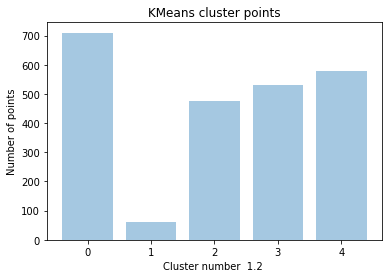

In [216]:
# visually how points are distributed across 10 clusters 

plt.bar([x for x in range(5)], df_n.groupby(['Tfidf Clus Label'])['clean_desc'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number  1.2 ")
plt.ylabel("Number of points")
plt.show()

In [188]:
# Reading a review which belong to each group.
for i in range(5):
    print("4 review of assigned to cluster ", i)
    print("-" * 70)
    print(df_n.iloc[df_n.groupby(['Tfidf Clus Label']).groups[i][5]]['clean_desc'])
    print('\n')
    print(df_n.iloc[df_n.groupby(['Tfidf Clus Label']).groups[i][10]]['clean_desc'])
    print('\n')
    print(df_n.iloc[df_n.groupby(['Tfidf Clus Label']).groups[i][20]]['clean_desc'])
    print('\n')
    print("_" * 70)

4 review of assigned to cluster  0
----------------------------------------------------------------------
function developer role involves developing algorithms automotive applications user interface inside vehicle vehicle dynamics controlling functions vehicle safety functions customization different modules influence vehicle safety dynamics detailed activities found mentioned work next generation braking platform hybrid electric vehicles work algorithm development automated braking functions park assist trafficjam pilot model based sensor signal processing model based sw development using ascet tool development testing simulation vehicle environments support cross functional teams vehicle application hydraulics sensors working global engineering teams realize oem requirements skill set knowledge embedded sw development knowledge sensor actuators relevant automotive electronics good analytical skills research mindset hands experience validation embedded sw applications


development s

In [190]:
df_n.drop(['Bow Clus Label'],axis = 1,inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [192]:
#exporting clusterd CSV File
df_n.to_csv('Clustered.csv')

# Observation:-
Kmeans for bag of words and TFIDF

* By using Elbow method, we generated optimal 5 clusters for both the bag of words and tfidf techniques.
* FOR TFIDF K means is best for identification than K MEANS for BOW, Because 
when BOW cluster are not evenly distributed as compared to TFIDF as you can 
in plots (reference-1.1,1.2).
* However, K means did best on the cluster centers top terms but however when we caopare reviews ,few places it is not matching.